In [1]:
import pandas as panda

In [2]:
import matplotlib.pyplot as plt

In [5]:
dataframe = panda.read_csv(("Ruter_data.csv"), delimiter =";")

In [6]:
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [7]:
dataframe.shape

(6000, 17)

In [ ]:
#We start with the feature engineering

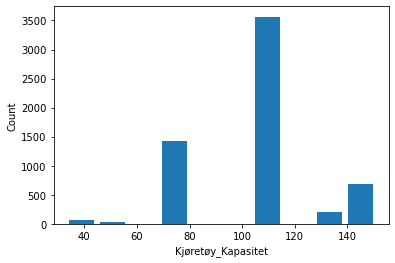

In [9]:
#Shows the capacity of the vehicles
plt.hist(dataframe.Kjøretøy_Kapasitet, bins=10, rwidth=0.8)
plt.xlabel('Kjøretøy_Kapasitet')
plt.ylabel('Count')
plt.show()

In [10]:
thresold_max = dataframe['Kjøretøy_Kapasitet'].quantile(0.90)

In [11]:
thresold_min = dataframe['Kjøretøy_Kapasitet'].quantile(0.10)

In [12]:
new_dataframe=dataframe[(dataframe['Kjøretøy_Kapasitet']<thresold_max) & (dataframe['Kjøretøy_Kapasitet']>thresold_min)]

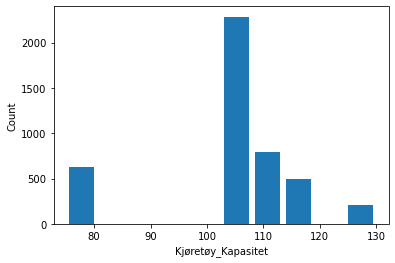

In [13]:
#Shows the capacity of the vehicles
plt.hist(new_dataframe.Kjøretøy_Kapasitet, bins=10, rwidth=0.8)
plt.xlabel('Kjøretøy_Kapasitet')
plt.ylabel('Count')
plt.show()

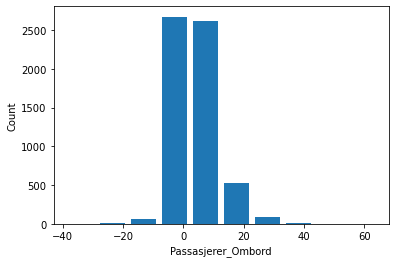

In [14]:
#Shows passengers on the transport.
plt.hist(dataframe.Passasjerer_Ombord, bins=10, rwidth=0.8)
plt.xlabel('Passasjerer_Ombord')
plt.ylabel('Count')
plt.show()

In [15]:
thresold_max = dataframe['Passasjerer_Ombord'].quantile(0.90)

In [16]:
thresold_min = dataframe['Passasjerer_Ombord'].quantile(0.10)

In [17]:
new_dataframe=dataframe[(dataframe['Passasjerer_Ombord']<thresold_max) & (dataframe['Passasjerer_Ombord']>thresold_min)]

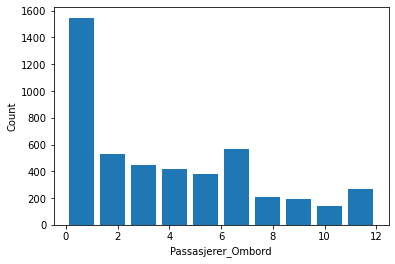

In [18]:
#Shows passengers on the transport.
plt.hist(new_dataframe.Passasjerer_Ombord, bins=10, rwidth=0.8)
plt.xlabel('Passasjerer_Ombord')
plt.ylabel('Count')
plt.show()

In [34]:
#Shows the info for Sagene at the date 10.08.2020
dataframe[(dataframe.Dato=="10/08/2020")&(dataframe.Kommune=="Sagene")]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
358,3718-2020-08-10T07:59:00+02:00,10/08/2020,Oslo,Indre By,Sagene,Kristoffer Aamots gate (mot Maridalsveien),Kristoffer Aamots bro (mot Maridalsveien),Lokal,Oslo,37,0,08:00:30,08:00:56,08:00:00,08:00:00,106,4


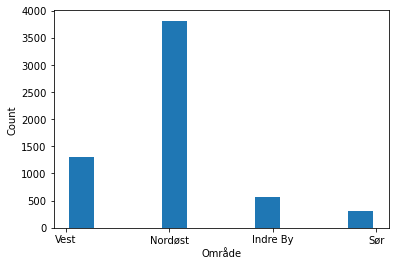

In [36]:
#Shows how much public transport there is in different areas
plt.hist(dataframe.Område, bins=10, rwidth=0.8)
plt.xlabel('Område')
plt.ylabel('Count')
plt.show()

In [37]:
#Shows the buses going to Tjernsmyr
dataframe[dataframe.Holdeplass_Til=="Tjernsmyr"]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
1531,14007-2020-07-31T07:25:00+02:00,31/07/2020,Viken,Vest,Bærum,Lysakerlokket (avstigning),Tjernsmyr,Lokal,Viken,145,1,07:32:52,07:33:00,07:32:00,07:32:00,130,0


In [38]:
#Now over to Data Visualization

In [40]:
#Loading the Iris dataset
iris = panda.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Text(0, 0.5, 'Frequency')

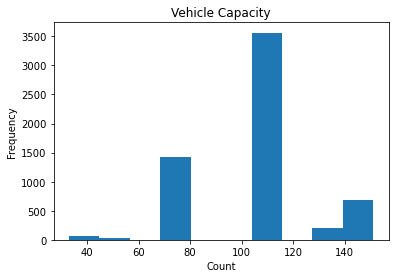

In [43]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dataframe['Kjøretøy_Kapasitet'])
# set title and labels
ax.set_title('Vehicle Capacity')
ax.set_xlabel('Count')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

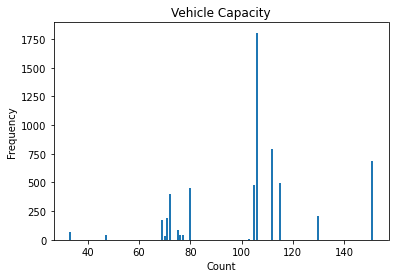

In [44]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = dataframe['Kjøretøy_Kapasitet'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Vehicle Capacity') 
ax.set_xlabel('Count') 
ax.set_ylabel('Frequency')

In [45]:
import seaborn as sns

C:\Users\Aleksander\anaconda3\envs\dave3625\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kjøretøy_Kapasitet', ylabel='count'>

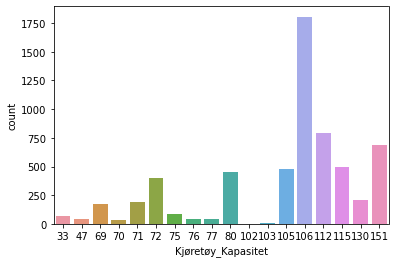

In [48]:
sns.countplot(dataframe['Kjøretøy_Kapasitet'])

C:\Users\Aleksander\anaconda3\envs\dave3625\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passasjerer_Ombord', ylabel='Density'>

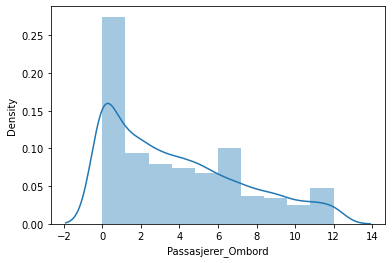

In [50]:
sns.distplot(new_dataframe['Passasjerer_Ombord'], bins=10, kde=True)